In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import os

In [2]:
dirname = os.path.join(os.path.abspath(os.curdir), 'data', 'underwork')

In [3]:
raw_data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}
for v in raw_data:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    raw_data[v] = (calm, work)

In [4]:
raw_valid = {"25":(), "27":()}
for v in raw_valid:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    raw_valid[v] = (calm, work)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

c:\Users\maga-\AppData\Local\Programs\Python\Python311\Lib\site-packages\gluonts\json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [6]:
data = []
for v in raw_data:
    data.append(raw_data[v][0])
    data.append(raw_data[v][1])

In [7]:
valid = []
for v in raw_valid:
    valid.append(raw_valid[v][0])
    valid.append(raw_valid[v][1])

In [8]:
for i in range(len(data)):
    temp = data[i]
    temp = temp.set_index(pd.date_range(start=0,periods=len(temp),freq="s"))
    data[i] = temp

In [9]:
for i in range(len(valid)):
    temp = valid[i]
    temp = temp.set_index(pd.date_range(start=0,periods=len(temp),freq="s"))
    valid[i] = temp

In [10]:
dataset = PandasDataset(data,target="1",freq="s")

In [11]:
model = DeepAREstimator(
    prediction_length=1, freq="s", trainer_kwargs={"max_epochs": 5}
).train(dataset)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\maga-\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                     | Out sizes  
-------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.1 K | [[1, 1], [1, 1], [1, 182, 7], [1, 182], [1, 182], [1, 1, 7]] | [1, 100, 1]
-------------------------------------------------------------------------------------------------------------------
25.1 K    Trainable params
0         Non-trainable params
25.1 K    Total params
0.100     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:35<00:00,  1.43it/s, v_num=3, train_loss=1.460]

Epoch 0, global step 50: 'train_loss' reached 1.46298 (best 1.46298), saving model to 'd:\\Projects\\practice13\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:36<00:00,  1.38it/s, v_num=3, train_loss=-.376]

Epoch 1, global step 100: 'train_loss' reached -0.37560 (best -0.37560), saving model to 'd:\\Projects\\practice13\\lightning_logs\\version_3\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:35<00:00,  1.41it/s, v_num=3, train_loss=-2.03]

Epoch 2, global step 150: 'train_loss' reached -2.02981 (best -2.02981), saving model to 'd:\\Projects\\practice13\\lightning_logs\\version_3\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:32<00:00,  1.53it/s, v_num=3, train_loss=-2.74]

Epoch 3, global step 200: 'train_loss' reached -2.74346 (best -2.74346), saving model to 'd:\\Projects\\practice13\\lightning_logs\\version_3\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:35<00:00,  1.42it/s, v_num=3, train_loss=-2.73]

Epoch 4, global step 250: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [00:35<00:00,  1.41it/s, v_num=3, train_loss=-2.73]


In [12]:
from pathlib import Path

In [14]:
model.serialize(Path("./model"))

In [19]:
test_data = []
for i in valid:
    temp = []
    for j in range(1,len(i)):
        temp.append(i[:j])
    test_data.append(temp)

In [ ]:
#Здесь я использую только один из тестовых рядов, т.к. вычисление предсказаний для всех тестовых рядов займет очень много времени 
pred = []
for i in [test_data[0]]:
    temp = PandasDataset(i,target="1",freq="s")
    pred_temp = []
    forecasts = model.predict(temp)
    for k,j in enumerate(forecasts):
        pred_temp.append(j.quantile(0.5)[0])
    pred.append(pred_temp)

In [31]:
pred = pred[0]

In [37]:
y_pred = pred
y_true = valid[0]["1"].to_numpy()

In [40]:
y_true = y_true[1:]

In [53]:
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            r2_score)
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validate(true, pred):
    true = pd.DataFrame(true)[0]
    pred = pd.DataFrame(pred)[0]
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("MAPE:", mean_absolute_percentage_error(true, pred))
    print("R2:", r2_score(true, pred))

In [54]:
print("Метрики на тестовых данных")
validate(y_true,y_pred)

Метрики на тестовых данных
MSE: 0.0001289755165428491
RMSE: 0.011356738816352567
MAE: 0.010109101285652506
MAPE: 0.747194996339873
R2: 0.9720617028509851


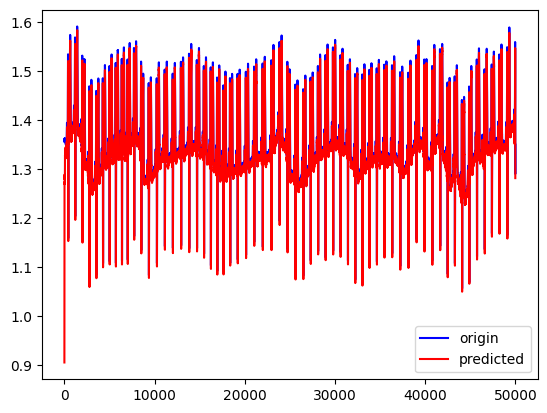

In [56]:
plt.plot(y_true,color="b",label="origin")
plt.plot(y_pred,color="r",label="predicted")
plt.legend()